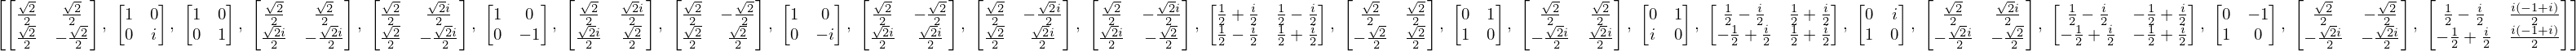

In [1]:
import sympy

M = sympy.Matrix
simplify = sympy.simplify
sqrt = sympy.sqrt
i = sympy.I
_i = i

from sympy.physics.quantum import Dagger
from sympy.physics.quantum import tensorproduct

sympy.init_printing()
H = simplify(M([[1, 1], [1, -1]]) / sqrt(2))
S = M([[1, 0], [0, i]])
C_L = [H, S]
basis_vectors = [M([1, 0]), M([0, 1])]

def getitem(m, i, j):
    # Note that sympy uses an extremely weird way to store the matrices,
    # in particular the internal representation is vastly different from what
    # is printed. For instance the H matrix is stored as a Mul object
    # (even after using simplify) instead of a matrix. 
    # Therefore m[i][j] will NOT work. This is a workaround.
    return (Dagger(basis_vectors[i]) * m * basis_vectors[j])[0]

def is_known(C_L, a):
    for c in C_L:
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return True
    return False
for i in range(5):
    for m in (H, S):
        for c in C_L:
            c = simplify(c*m)
            if(is_known(C_L, c)):
                continue
            C_L.append(c)
C_L

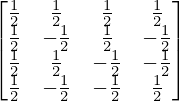

In [3]:
H2 = tensorproduct.matrix_tensor_product(H, H)
H2

In [4]:
zero_state = M([1, 0, 0, 0])

In [6]:
plus_state = H2 * zero_state
plus_state

In [7]:
I = M([[1, 0], [0, 1]])

In [8]:
C_L_0 = [tensorproduct.matrix_tensor_product(I, c) for c in C_L]

In [9]:
C_L_1 = [tensorproduct.matrix_tensor_product(c, I) for c in C_L]

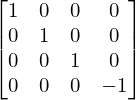

In [13]:
CZ = M([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])
CZ

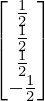

In [11]:
CZ * plus_state

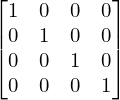

In [14]:
I_4 = M([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
I_4

In [17]:
from itertools import product
starting_states = [ c0 * c1 * ent * plus_state for ent, c0, c1 in product((I_4, CZ), C_L_0, C_L_1)]


In [18]:
len(starting_states) == 2 * 24**2

True

In [19]:
resulting_states = [CZ * s for s in starting_states]

In [20]:
def get_starting_state_index(s):
    for i, test in enumerate(starting_states):
        if(simplify(test - s) == M([[0, 0], [0, 0]])):
            return i
    raise NotImplementedError()
    

In [21]:
results = [get_starting_state_index(s) for s in resulting_states]

NotImplementedError: 